In [104]:
#problem 1
#load packages
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [214]:
data = pd.read_csv('Q1.data',sep='\t')


type(data)


phenotype_df = data.iloc[:,-1:]
genotype_df = data.iloc[:, :-1]

phenotype = data.iloc[:,-1:].to_numpy()
genotype = data.iloc[:, :-1].to_numpy()

dimensions = np.shape(genotype)
rows, columns = dimensions

#print(columns) #there are 2000 snps and 1 phenotype 

bonf_pvalue = 0.05/2000
print(bonf_pvalue)

rows #there's 1000 rows and 2000 columns 


2.5e-05


1000

In [127]:
#do linear regressions 
p_value_array = []

for i in range(0,columns-1):  #indices
    X_temp = genotype[:, i]
    X_temp = sm.add_constant(X_temp)
    model = sm.OLS(phenotype, X_temp)
    results = model.fit()
    p_value_array.append(results.pvalues[1])


In [128]:
indices_significant = np.where(np.array(p_value_array) < bonf_pvalue)[0]
print(len(indices_significant))

#there are 14 significant SNP's. 

14


[4.11657463e-07 1.06781704e-06 1.43385000e-06 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


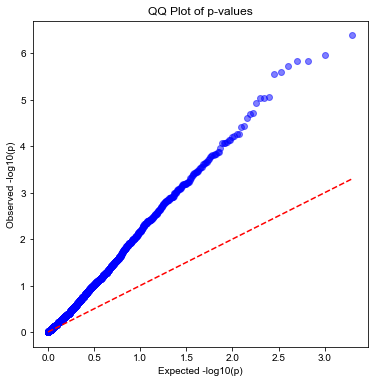

In [244]:
#QQ plot 

sorted_p_values = np.sort(p_value_array)
n = len(sorted_p_values)

expected = -np.log10(np.linspace(1 / n, 1, n)) #expected p values
observed = sorted_p_values
print(observed)

# Plotting the QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(expected, -np.log10(observed), color='blue', alpha=0.5)
plt.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='--')
plt.xlabel('Expected -log10(p)')
plt.ylabel('Observed -log10(p)')
plt.title('QQ Plot of p-values')
plt.savefig("qqplot.png",dpi = 500)
#there is inflation in p values as seen by the q q plot. 

#above threshold = more rejection 

<AxesSubplot:title={'center':'$\\lambda = 2.676$'}, xlabel='$Expected(-log_{10}{(P)})$', ylabel='$Observed(-log_{10}{(P)})$'>

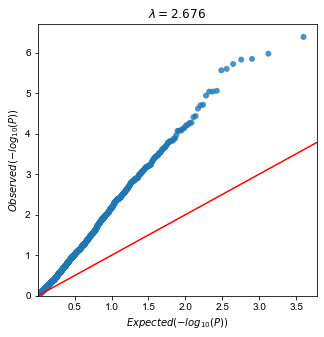

In [64]:
import pandas as pd
from qmplot import qqplot

qqplot(sorted_p_values)

#double checking that this is correct using this random guy's package!

1000

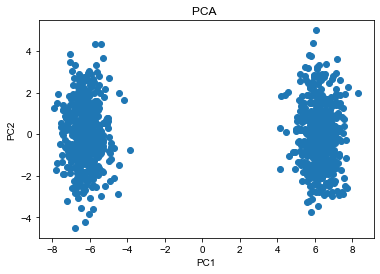

In [246]:
#1b

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_data = pca.fit_transform(genotype)

plt.scatter(new_data[:,0], new_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA ')
plt.savefig("clusters.png",dpi = 500)

len(new_data[:,0]) #there are 1000 different values of pc1 which is as many as the number of individuals, so how do I add this as a term for pc1? 

#there seem to be two very distinct clusters here, meaning there are probably two popualtions. 
#how to add a term for pc1? ancestry groups 1 and 2. 

#either each SNP or each individual has a weight? or each person can be defined by a combination of PC1 and PC2.  


In [234]:
#now adding a term for pc1 in regression. 

pc1 = new_data[:,0]


print(genotype_df.iloc[:,1])


#idk numpy 
p_value_array2 = []

#don't know 
#now to concatenate? 
#somehow. 
for i in range(0,columns-1):  #indices
    X_temp = sm.add_constant(np.column_stack((genotype_df.iloc[:,i], pc1)))
    model = sm.OLS(phenotype, X_temp)
    results = model.fit()
    p_value_array2.append(results.pvalues[1])





0      2
1      1
2      2
3      1
4      2
      ..
995    2
996    1
997    1
998    1
999    0
Name: snp_1, Length: 1000, dtype: int64


0
[4.48721363e-04 2.20948475e-03 3.29246255e-03 ... 9.97643317e-01
 9.98330808e-01 9.98695849e-01]


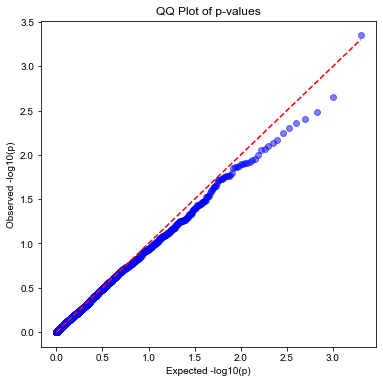

In [247]:
indices_significant = np.where(np.array(p_value_array2) < bonf_pvalue)[0]
print(len(indices_significant))


sorted_p_values = np.sort(p_value_array2)
n = len(sorted_p_values)

expected = -np.log10(np.linspace(1 / n, 1, n)) #expected p values
observed = sorted_p_values
print(observed)

# Plotting the QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(expected, -np.log10(observed), color='blue', alpha=0.5)
plt.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='--')
plt.xlabel('Expected -log10(p)')
plt.ylabel('Observed -log10(p)')
plt.title('QQ Plot of p-values')
plt.savefig("qqplot2.png",dpi = 500)


#none of them are significant. 